# Initial EDA

This Notebook outlines the initial EDA carried out on the LOB data. Initially the code has been written on a small sample of the full LOB dataset. To ensure no trends or outliers are missed this EDA will need to be run against the full dataset.

In [1]:
import pandas as pd


In [2]:
# Read in sample data
sample_csv = 'data/output/EDA_lob_output_data_sample.csv' # define path to sampel data

lob_sample = pd.read_csv(sample_csv)

In [3]:
# Reorder columns - this makes data and timestamp easier to read
desired_column_order = ['Timestamp', 'Date', 'Exchange', 'Bid', 'Ask', 'Mid_Price']
lob_sample = lob_sample[desired_column_order]
lob_sample.head()

,Timestamp,Date,Exchange,Bid,Ask,Mid_Price
0,0.000,2025-01-02,Exch0,[],[],NaN
1,0.279,2025-01-02,Exch0,"[[1, 6]]",[],NaN
2,1.333,2025-01-02,Exch0,"[[1, 6]]","[[800, 1]]",400.5
3,1.581,2025-01-02,Exch0,"[[1, 6]]","[[799, 1]]",400.0
4,1.643,2025-01-02,Exch0,"[[1, 6]]","[[798, 1]]",399.5


## Tick Time

In [4]:
# Convert Date to datetime data type
lob_sample['Date'] = pd.to_datetime(lob_sample['Date'])

# Sort DataFrame by date
lob_sample = lob_sample.sort_values(['Date','Timestamp'])

# Calculate the difference between Timestamps (Tick Time) grouped by day 
lob_sample['Tick_Time'] = lob_sample.groupby('Date')['Timestamp'].diff()

lob_sample.head()

,Timestamp,Date,Exchange,Bid,Ask,Mid_Price,Tick_Time
0,0.000,2025-01-02,Exch0,[],[],NaN,NaN
1,0.279,2025-01-02,Exch0,"[[1, 6]]",[],NaN,0.279
2,1.333,2025-01-02,Exch0,"[[1, 6]]","[[800, 1]]",400.5,1.054
3,1.581,2025-01-02,Exch0,"[[1, 6]]","[[799, 1]]",400.0,0.248
4,1.643,2025-01-02,Exch0,"[[1, 6]]","[[798, 1]]",399.5,0.062


In [5]:
# Identify NaN Tick Time
missing_tick_time_count = lob_sample['Tick_Time'].isnull().sum()

print(f'Number of missing tick times: {missing_tick_time_count} ({missing_tick_time_count/len(lob_sample):.4f}% of the sample)')

Number of missing tick times: 3 (0.0000% of the sample)


In [6]:
# Full descriptive analytics of ticktime
lob_sample['Tick_Time'].describe()

count    1.037931e+06
mean     8.844485e-02
std      7.361408e-02
min      3.100000e-02
25%      3.100000e-02
50%      6.200000e-02
75%      1.240000e-01
max      1.798000e+00
Name: Tick_Time, dtype: float64

In [7]:
# Group by date and calculate the average number difference
average_ticktime_by_date = lob_sample.groupby('Date')['Tick_Time'].mean()
## would be good to show this as a distribution to se if there are any outliers

# Calculate the average Tick Time across the dataset
average_ticktime = lob_sample['Tick_Time'].mean()

# Count the distinct number of dates
date_count = lob_sample['Date'].nunique()

In [8]:
# Min and Max values for Tick Time
max_ticktime = lob_sample['Tick_Time'].max()
min_ticktime = lob_sample['Tick_Time'].min()

print(f'The average tick time across the {date_count} dates is {average_ticktime:.4f} Seconds.')
print(f'The maximum and minimum tick times across the {date_count} are {max_ticktime:.4f} Seconds and {min_ticktime:.4f} Seconds respectively.')

The average tick time across the 3 dates is 0.0884 Seconds.
The maximum and minimum tick times across the 3 are 1.7980 Seconds and 0.0310 Seconds respectively.


In [9]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Set up plot style
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (12, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
colors = ['#04f5ff','#e90052', '#00ff85', '#38003c']
sns.set_palette(sns.color_palette(colors));

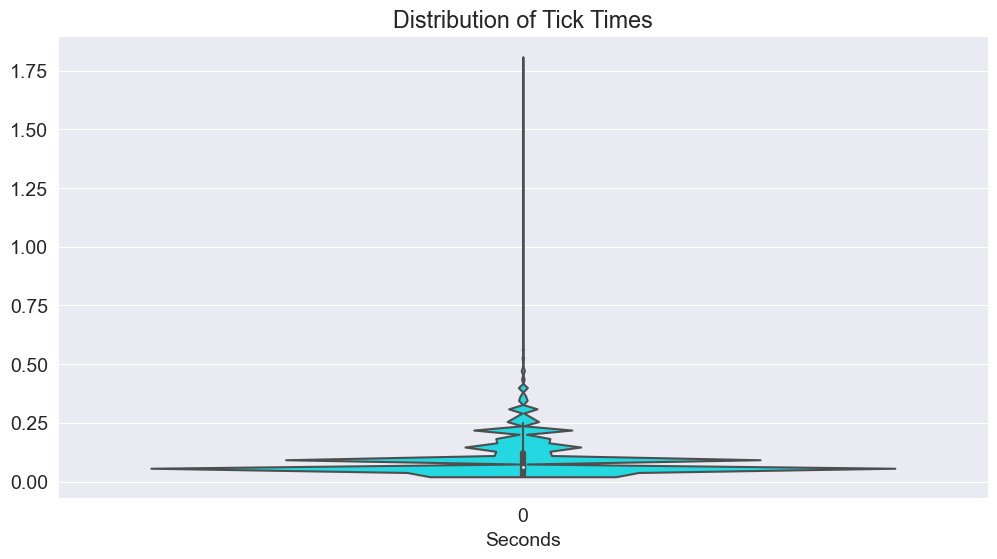

In [10]:
#Create a violin plot showing the distribution of Tick Times.
ax = sns.violinplot(data=round(lob_sample['Tick_Time'], 2))
ax.set(title = 'Distribution of Tick Times',
       xlabel ='Seconds');

In [11]:
# Identify outliers in tick time

In [12]:
# Group by date and count the number of ticks (number of entries) 
ticks_by_date = lob_sample.groupby('Date')['Timestamp'].count()
ticks_by_date.describe()

count         3.000000
mean     345978.000000
std       11435.709379
min      332781.000000
25%      342482.000000
50%      352183.000000
75%      352576.500000
max      352970.000000
Name: Timestamp, dtype: float64

## Mid-Price

In [13]:
# Identify NaN Mid Price
missing_mid_price_count = lob_sample['Mid_Price'].isnull().sum()

print(f'Number of missing mid_price: {missing_mid_price_count} ({missing_mid_price_count/len(lob_sample):.4f}% of the sample)')

Number of missing mid_price: 81 (0.0001% of the sample)


In [14]:
# Full descriptive analytics of mid price
lob_sample['Mid_Price'].describe()

count    1.037853e+06
mean     3.029690e+02
std      2.707844e+01
min      1.335000e+02
25%      2.895000e+02
50%      2.985000e+02
75%      3.140000e+02
max      5.570000e+02
Name: Mid_Price, dtype: float64

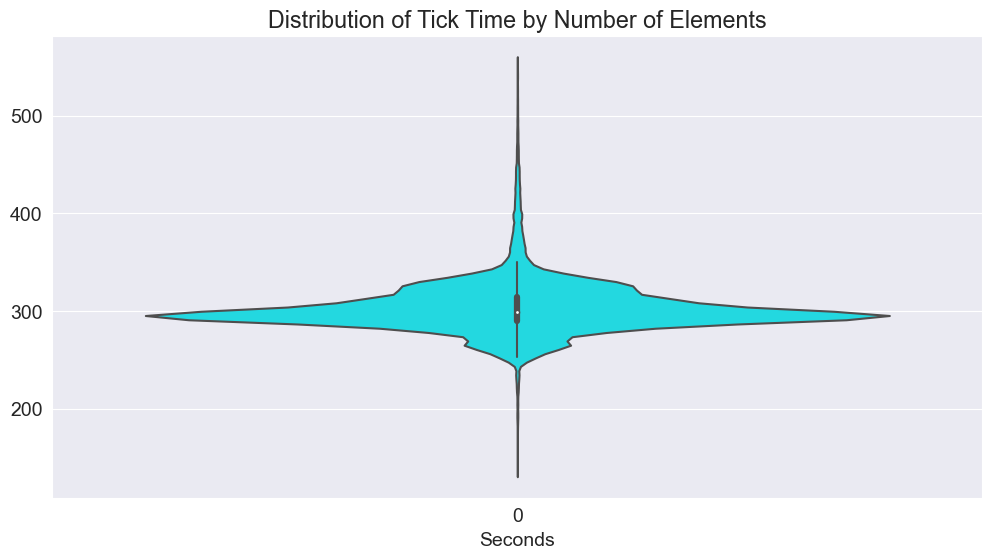

In [17]:
#Create a box plot showing the distribution of Mid Price.
ax = sns.violinplot(data=round(lob_sample['Mid_Price'], 2))
ax.set(title = 'Distribution of Mid-Price',
       xlabel ='Seconds');

c:\Users\Jack\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Jack\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Jack\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Jack\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.uniqu

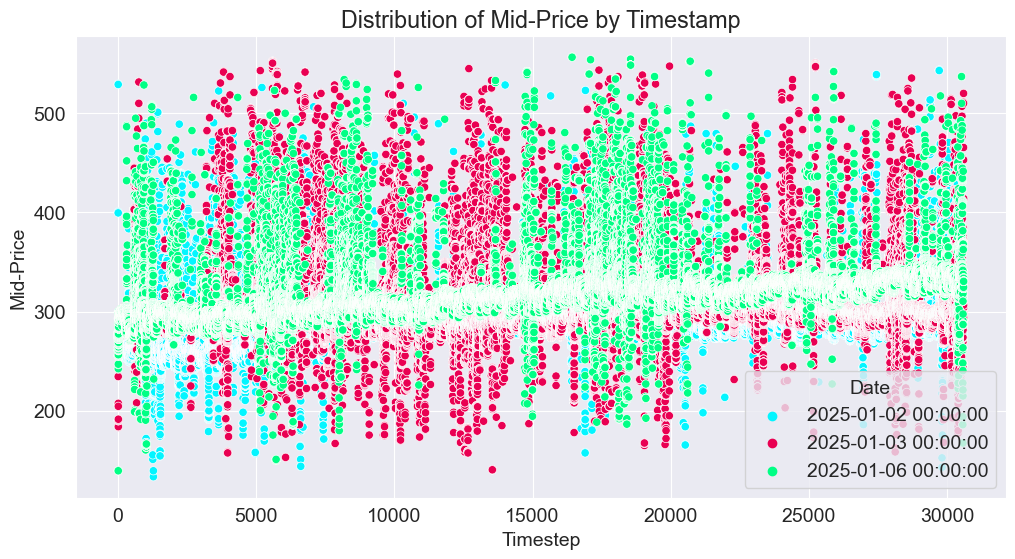

In [19]:
#Create a scatter plot showing the distribution of Mid Price against timestamp.
ax = sns.scatterplot(x=lob_sample['Timestamp'], y=lob_sample['Mid_Price'], hue=lob_sample['Date'])
ax.set(title = 'Distribution of Mid-Price by Timestamp',
       xlabel ='Timestep',
       ylabel ='Mid-Price');